## 1.Intsall And Import Dependedences

In [2]:
!pip install easyocr
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=0792e7550139214e09e98abc46466d5cc360b91fc285584b3b30005596f06f75
  Stored in directory: /Users/ravijgowda/Library/Caches/pip/wheels/4b/a5/2d/4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils

## 2. Read in Image, Grayscale and Blur

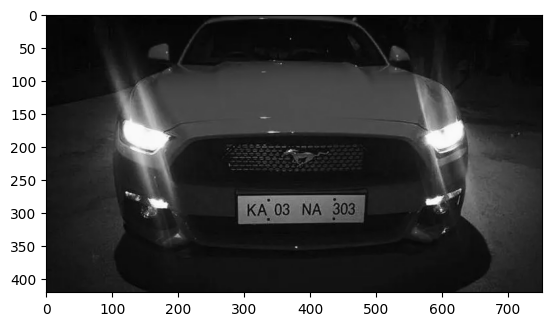

In [59]:
img = cv2.imread('image2.webp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

## 3. Apply filter and find edges for localization

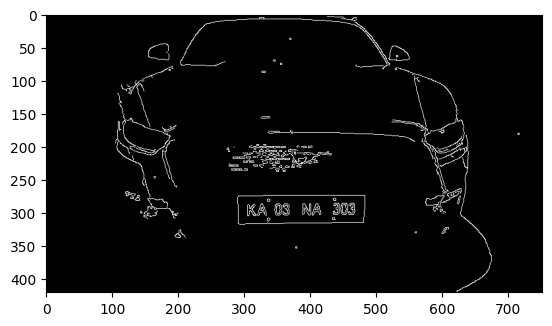

In [60]:
bfilter = cv2.bilateralFilter(gray,11,17,17)
edged = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

##  4. Find Contours and Apply Mask

In [62]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [63]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [64]:
location

array([[[290, 277]],

       [[293, 318]],

       [[481, 315]],

       [[483, 274]]], dtype=int32)

In [65]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

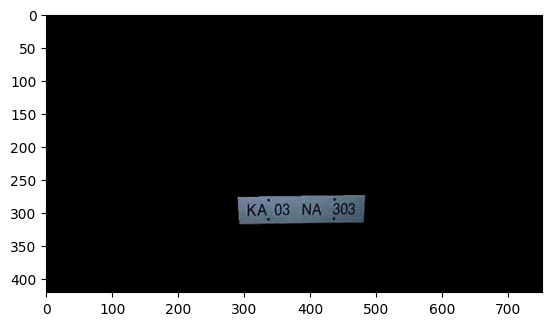

In [66]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [67]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

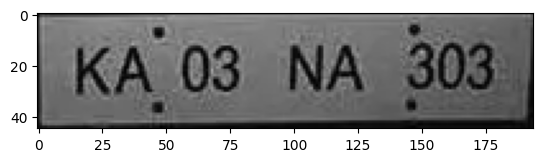

In [68]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 5. Use Easy OCR To Read Text

In [77]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result = " ".join([text for _, text, _ in result])
result

'KA 03 NA 303'

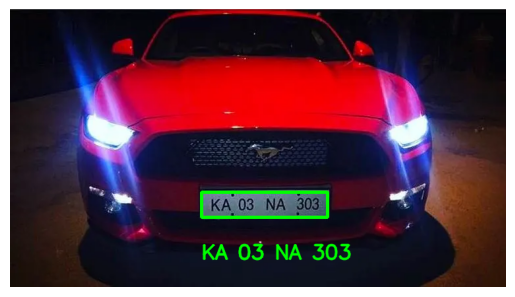

In [80]:

result = reader.readtext(cropped_image)
if result:
    text = " ".join([text for _, text, _ in result])

    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No text detected in the image.")
